# Clase 4: Métodos de Representación

In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 259.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


El dataset fue obtenido de Kaggle: https://www.kaggle.com/datasets/exactful/wikipedia-movies/data

In [3]:
df = pd.read_csv('1990s-movies.csv')
df.shape

(3105, 3)

In [4]:
df['plot'].head()

,plot
0,Gwen Moss (Jeanne Tripplehorn) has spent the b...
1,The film tells a story in the life of a Midwes...
2,"Cameron James, a new student at Padua High Sch..."
3,American video game designer Roger Dearly live...
4,In the murder trial of a teenage boy from a ci...


## Preprocesamiento
Antes de poder trabajar con el texto, debemos preprocesarlo, de forma que aseguremos que el input que ingrese a nuestros análisis sea el correcto.

### 1. Pasar todo a minúsculas

In [5]:
df['plot'] = df['plot'].str.lower()
df['plot'].head()

,plot
0,gwen moss (jeanne tripplehorn) has spent the b...
1,the film tells a story in the life of a midwes...
2,"cameron james, a new student at padua high sch..."
3,american video game designer roger dearly live...
4,in the murder trial of a teenage boy from a ci...


### 2. Eliminar los espacios en blanco en exceso

In [6]:
" ".join("hola      mi    nombre  es erasmo".split())

'hola mi nombre es erasmo'

In [7]:
df['plot'] = df['plot'].apply(lambda x: " ".join(x.split()))
df['plot'].head()

,plot
0,gwen moss (jeanne tripplehorn) has spent the b...
1,the film tells a story in the life of a midwes...
2,"cameron james, a new student at padua high sch..."
3,american video game designer roger dearly live...
4,in the murder trial of a teenage boy from a ci...


### 3. Tokenizamos las palabras
Nota: En algunos casos puede ser necesario tokenizar primero por oraciones y luego por palabras.

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize

df['plot'] = df['plot'].apply(word_tokenize)
df['plot'].head()

,plot
0,"[gwen, moss, (, jeanne, tripplehorn, ), has, s..."
1,"[the, film, tells, a, story, in, the, life, of..."
2,"[cameron, james, ,, a, new, student, at, padua..."
3,"[american, video, game, designer, roger, dearl..."
4,"[in, the, murder, trial, of, a, teenage, boy, ..."


### 3. Remover los stopwords
Los stopwords son palabras que se usan con frecuencia, pero no aportan al texto en muchos casos.

In [9]:
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')
df['plot'] = df['plot'].apply(lambda x: [y for y in x if y not in en_stopwords])
df['plot'].head()

,plot
0,"[gwen, moss, (, jeanne, tripplehorn, ), spent,..."
1,"[film, tells, story, life, midwestern, family,..."
2,"[cameron, james, ,, new, student, padua, high,..."
3,"[american, video, game, designer, roger, dearl..."
4,"[murder, trial, teenage, boy, city, slum, ,, a..."


### 4. Remover signos de puntuación
Se eliminan los signos de puntuación, ya que en la mayoría de casos no tienen aporte al significado.

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")
df['plot'] = df['plot'].apply(lambda x: tokenizer.tokenize(' '.join(x)))
df['plot'].head()

,plot
0,"[gwen, moss, jeanne, tripplehorn, spent, bette..."
1,"[film, tells, story, life, midwestern, family,..."
2,"[cameron, james, new, student, padua, high, sc..."
3,"[american, video, game, designer, roger, dearl..."
4,"[murder, trial, teenage, boy, city, slum, accu..."


### 7. Guardamos la forma no tokenizada
Para algunos algoritmos, requeriremos la forma no tokenizadas; mientras que para otros sí. Por tanto, los guardamos en columnas separadas.

In [11]:
df['plot2']= df['plot'].apply(lambda x: ' '.join(x))

In [12]:
df[['plot','plot2']].head()

,plot,plot2
0,"[gwen, moss, jeanne, tripplehorn, spent, bette...",gwen moss jeanne tripplehorn spent better part...
1,"[film, tells, story, life, midwestern, family,...",film tells story life midwestern family reimul...
2,"[cameron, james, new, student, padua, high, sc...",cameron james new student padua high school se...
3,"[american, video, game, designer, roger, dearl...",american video game designer roger dearly live...
4,"[murder, trial, teenage, boy, city, slum, accu...",murder trial teenage boy city slum accused mur...


# Representación Bag of Words
Se puede obtener la representación de Bag of Words fácilmente empleando el CountVectorizer de sklearn. Cabe destacar que esta función tiene algunos argumentos de preproceamiento, por lo que algunos pasos que se ejecutaron previamente estarían duplicados. Revise la documentación en: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [13]:
# Se genera un dataset de 2 documentos, solo para visualizar
df_disperso = df[:10].copy(deep=True)
df_disperso

,title,image,plot,plot2
0,'Til There Was You,https://upload.wikimedia.org/wikipedia/en/9/9a...,"[gwen, moss, jeanne, tripplehorn, spent, bette...",gwen moss jeanne tripplehorn spent better part...
1,...First Do No Harm,https://upload.wikimedia.org/wikipedia/en/0/07...,"[film, tells, story, life, midwestern, family,...",film tells story life midwestern family reimul...
2,10 Things I Hate About You,https://upload.wikimedia.org/wikipedia/en/9/95...,"[cameron, james, new, student, padua, high, sc...",cameron james new student padua high school se...
3,101 Dalmatians (1996 film),https://upload.wikimedia.org/wikipedia/en/e/ef...,"[american, video, game, designer, roger, dearl...",american video game designer roger dearly live...
4,12 Angry Men (1997 film),https://upload.wikimedia.org/wikipedia/en/4/44...,"[murder, trial, teenage, boy, city, slum, accu...",murder trial teenage boy city slum accused mur...
5,12 Monkeys,https://upload.wikimedia.org/wikipedia/en/c/cf...,"[deadly, virus, released, 1996, wipes, almost,...",deadly virus released 1996 wipes almost humani...
6,12:01 (1993 film),https://upload.wikimedia.org/wikipedia/en/8/8b...,"[barry, thomas, bored, job, moons, high, profi...",barry thomas bored job moons high profile scie...
7,1994 Baker Street: Sherlock Holmes Returns,https://upload.wikimedia.org/wikipedia/en/a/a3...,"[sherlock, holmes, awakened, modern, times, su...",sherlock holmes awakened modern times suspende...
8,2 Days in the Valley,https://upload.wikimedia.org/wikipedia/en/a/a6...,"[two, hitmen, lee, woods, mafioso, dosmo, pizz...",two hitmen lee woods mafioso dosmo pizzo walk ...
9,"20,000 Leagues Under the Sea (1997 miniseries)",https://upload.wikimedia.org/wikipedia/en/0/02...,"[nautilus, sinking, damaging, ships, first, th...",nautilus sinking damaging ships first thought ...


In [14]:
df_disperso['plot2']

,plot2
0,gwen moss jeanne tripplehorn spent better part...
1,film tells story life midwestern family reimul...
2,cameron james new student padua high school se...
3,american video game designer roger dearly live...
4,murder trial teenage boy city slum accused mur...
5,deadly virus released 1996 wipes almost humani...
6,barry thomas bored job moons high profile scie...
7,sherlock holmes awakened modern times suspende...
8,two hitmen lee woods mafioso dosmo pizzo walk ...
9,nautilus sinking damaging ships first thought ...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
#BAG OF WORDS
vectorizer = CountVectorizer() #Se crea primero
vectorizer.fit(df_disperso['plot2'])

CountVectorizer()

In [16]:
# Obtenemos el vocabulario para saber qué índice corresponde a cada palabra
vocabulary = vectorizer.vocabulary_
vocabulary = {k: v for k, v in sorted(vocabulary.items(), key=lambda item: item[1])}
print("Vocabulary: ", vocabulary)

Vocabulary:  {'000': 0, '10': 1, '11': 2, '12': 3, '141': 4, '15': 5, '1940s': 6, '1957': 7, '1990': 8, '1996': 9, '2035': 10, '24': 11, '30': 12, '500': 13, '84': 14, '92': 15, 'abandoned': 16, 'abbasac': 17, 'abduct': 18, 'aboard': 19, 'abraham': 20, 'absorbed': 21, 'accelerates': 22, 'accelerator': 23, 'accepted': 24, 'accepts': 25, 'accident': 26, 'accidentally': 27, 'accompanied': 28, 'accompaniment': 29, 'accompany': 30, 'account': 31, 'accurate': 32, 'accused': 33, 'achieve': 34, 'acquiesce': 35, 'acquittal': 36, 'across': 37, 'act': 38, 'actions': 39, 'activates': 40, 'activities': 41, 'actual': 42, 'actually': 43, 'adamantly': 44, 'added': 45, 'addiction': 46, 'adkins': 47, 'admits': 48, 'admitted': 49, 'adopt': 50, 'advances': 51, 'affluent': 52, 'afford': 53, 'africa': 54, 'african': 55, 'afterwards': 56, 'agent': 57, 'agree': 58, 'agrees': 59, 'aided': 60, 'airedale': 61, 'airport': 62, 'alarmists': 63, 'alcoholic': 64, 'allan': 65, 'allison': 66, 'allow': 67, 'allowing': 6

In [17]:
len(vocabulary)

1605

In [18]:
df_disperso['plot2'][0]

'gwen moss jeanne tripplehorn spent better part life waiting man dreams unaware briefly bumped school children several close encounters ever since aspires life like longtime friend debbie jennifer aniston successful doctor beautiful home marriage may perfect seems surface gwen hired ghostwrite autobiography former child star francesca lanfield sarah jessica parker whose career virtually ended following stint long running partridge family brady bunch hybrid sitcom francesca owns la fortuna picturesque vintage apartment complex filmed historic el cabrillo architect nick dawkan s dylan mcdermott boss timo wants buy demolish complex firm construct modern condominium development place francesca agrees sale long nick placed charge project two embark somewhat tempestuous relationship damaged emotionally francesca overcome addiction drugs still craves spotlight nick dealing memory father failed songwriter became hopeless alcoholic meanwhile gwen shocked discover father saul never loved mother 

In [19]:
df_disperso.iloc[0][['plot2']]

,0
plot2,gwen moss jeanne tripplehorn spent better part...


Ahora veremos un caso y lo transformaremos a su forma de Bag of Words

In [20]:
# El primer 1 del vector corresponde a la posicion 9. La palabra en esa posición es addiction.
vector = vectorizer.transform(df_disperso.iloc[0][['plot2']])
print("Encoded Document is:")
print(vector.toarray())

Encoded Document is:
[[0 0 0 ... 0 0 0]]


In [21]:
len(vector.toarray()[0])

1605

In [54]:
len(vector.toarray()[0])

527

In [41]:
# Corroboramos si la palabra addiction se encuentra en el texto
[x for x in df_disperso.iloc[0]['plot2'].split(' ') if x=='addiction']

['addiction']

In [45]:
vector.toarray()[0]

array([0, 0, 0, ..., 0, 1, 0])

# Introducción a Word2Vec

**Word2Vec** es una técnica computacional que convierte palabras en vectores de números, representando el significado y relaciones entre ellas. Si dos palabras aparecen en contextos similares, sus vectores también serán similares.

### Ejemplo práctico con gensim

In [60]:
# Si no tienes gensim instalado, ejecuta esto:
!pip install gensim

In [64]:
# Corpus sencillo tokenizado
corpus = [
    ["el", "gato", "se", "sentó", "en", "la", "alfombra"],
    ["el", "perro", "se", "echó", "en", "la", "alfombra"],
    ["la", "reina", "y", "el", "rey", "viven", "en", "el", "castillo"],
    ["el", "gato", "y", "el", "perro", "son", "amigos"],
    ["la", "princesa", "es", "hija", "de", "la", "reina"],
    ["la", "reina", "es", "una","mujer"],
    ["el", "rey", "es", "un","hombre"],
    ["el", "gato", "come", "en","el", "castillo"],
    ["el", "gato", "duerme", "en","el", "castillo"],
    ["el", "perro", "come", "en","el", "castillo"],
    ["el", "perro", "duerme", "en","el", "castillo"],
    ["el", "gato", "come", "en","el", "castillo"],
    ["el", "rey", "come", "en","el", "castillo"],
    ["el", "rey", "duerme", "en","el", "castillo"],
    ["el", "princesa", "come", "en","el", "castillo"],
    ["el", "gato", "come", "en","el", "castillo"],
    ["el", "gato", "duerme", "en","el", "castillo"],
    ["el", "perro", "come", "en","el", "castillo"],
    ["el", "perro", "duerme", "en","el", "castillo"]
]

In [74]:
from gensim.models import Word2Vec

modelo = Word2Vec(corpus, vector_size=50, window=2, min_count=1, sg=1) #parametros iniciales

### Palabras similares a 'reina'

In [57]:
similares = modelo.wv.most_similar("gato")
print("Palabras similares a 'gato':")
similares

Palabras similares a 'gato':


[('la', 0.3257358968257904),
 ('echó', 0.32176274061203003),
 ('rey', 0.2332448661327362),
 ('sentó', 0.23322045803070068),
 ('duerme', 0.1524868905544281),
 ('castillo', 0.1456650346517563),
 ('mujer', 0.1169879212975502),
 ('y', 0.08213797956705093),
 ('el', 0.03830207139253616),
 ('amigos', 0.028040163218975067)]

In [58]:
for palabra, similitud in similares:
    print(palabra, "->", similitud)

la -> 0.3257358968257904
echó -> 0.32176274061203003
rey -> 0.2332448661327362
sentó -> 0.23322045803070068
duerme -> 0.1524868905544281
castillo -> 0.1456650346517563
mujer -> 0.1169879212975502
y -> 0.08213797956705093
el -> 0.03830207139253616
amigos -> 0.028040163218975067


### Analogías: rey - hombre + mujer ≈ reina

In [69]:
resultado = modelo.wv.most_similar(positive=["rey", "mujer"], negative=["hombre"])
print("Resultado de la analogía rey - hombre + mujer:", resultado[0][0])

Resultado de la analogía rey - hombre + mujer: castillo


### Vector numérico de una palabra ('gato')

In [59]:
print("Vector de 'gato':")
print(modelo.wv["gato"])

Vector de 'gato':
[-0.00542558  0.02092538  0.03117182 -0.01362887 -0.00184593 -0.0178119
  0.01200876  0.00871768  0.0215347   0.0190742   0.02976771  0.02897524
  0.02470658 -0.02183228 -0.02861422 -0.0011054  -0.0097253   0.02471318
  0.01853208 -0.00482335  0.00474896  0.00560169  0.02449285 -0.02973404
 -0.00059735  0.0108627  -0.00297958  0.0262105   0.02814242  0.02037549
 -0.00227461  0.02405597]


In [60]:
len(modelo.wv["gato"])

32

### Visualización de palabras en el espacio semántico
Ahora vamos a graficar cómo Word2Vec ubicó cada palabra en un espacio de 2 dimensiones usando PCA.

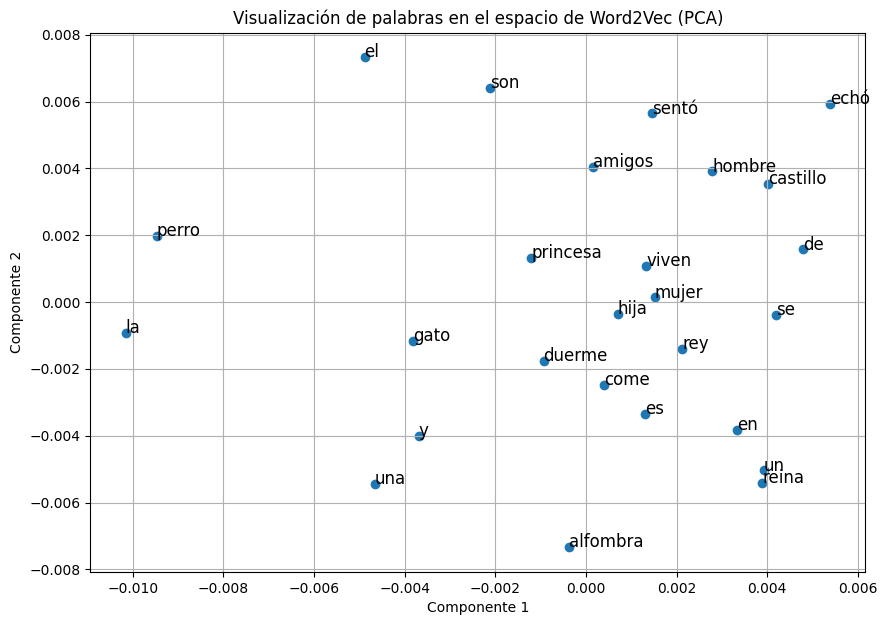

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

palabras = list(modelo.wv.index_to_key)
vectores = np.array([modelo.wv[palabra] for palabra in palabras])

pca = PCA(n_components=2)
vectores_2d = pca.fit_transform(vectores)

plt.figure(figsize=(10, 7))
plt.scatter(vectores_2d[:, 0], vectores_2d[:, 1])
for i, palabra in enumerate(palabras):
    plt.annotate(palabra, (vectores_2d[i, 0], vectores_2d[i, 1]), fontsize=12)
plt.title("Visualización de palabras en el espacio de Word2Vec (PCA)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()

Este gráfico muestra cómo las palabras se agrupan según su significado/contexto en el espacio de Word2Vec.